# Gesture recognition with random forest

### Libraries

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

### Load data

In [3]:
df = pd.read_csv('data/coordinates_3_axes.csv').drop(['Unnamed: 0'], axis=1)
df.head(10)

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,gesture
0,0.655300,0.797478,-1.246077e-07,0.638530,0.789618,-0.009517,0.626456,0.774549,-0.017395,0.627940,...,0.678428,0.764551,-0.032858,0.670640,0.779527,-0.030473,0.666318,0.783533,-0.026839,RightIndexExtended
1,0.656982,0.795708,-1.155886e-07,0.639761,0.789950,-0.010876,0.626459,0.776845,-0.020032,0.626465,...,0.677158,0.765850,-0.033579,0.671602,0.780474,-0.030501,0.670305,0.781371,-0.026253,RightIndexExtended
2,0.639966,0.805850,-1.113507e-07,0.622443,0.801691,-0.010016,0.608082,0.789487,-0.017808,0.604689,...,0.657206,0.784563,-0.032015,0.652515,0.796286,-0.029051,0.652769,0.796856,-0.025029,RightIndexExtended
3,0.586551,0.829212,-1.664201e-07,0.564562,0.824383,-0.006751,0.546489,0.811764,-0.013807,0.536044,...,0.580038,0.805733,-0.035127,0.582535,0.818498,-0.031384,0.589371,0.814394,-0.027303,RightIndexExtended
4,0.617386,0.804443,-1.801220e-07,0.597102,0.799710,-0.009210,0.578753,0.783525,-0.016062,0.575107,...,0.629085,0.779588,-0.032732,0.625388,0.792956,-0.029057,0.628077,0.793185,-0.024732,RightIndexExtended
5,0.681748,0.754461,-1.391937e-07,0.659762,0.733224,-0.006598,0.650564,0.701524,-0.011579,0.658038,...,0.709125,0.691953,-0.026055,0.700085,0.710291,-0.022315,0.694851,0.722158,-0.016915,RightIndexExtended
6,0.612874,0.771584,-1.902044e-07,0.589904,0.757670,-0.010204,0.574389,0.731170,-0.017582,0.570312,...,0.629471,0.721322,-0.035450,0.623135,0.741180,-0.031387,0.623171,0.749525,-0.025610,RightIndexExtended
7,0.688335,0.790109,-4.173204e-08,0.675728,0.781218,-0.012588,0.667712,0.759930,-0.020942,0.672397,...,0.729023,0.764134,-0.035865,0.715558,0.779661,-0.032581,0.705217,0.782809,-0.027736,RightIndexExtended
8,0.723751,0.815432,-1.093951e-07,0.705919,0.797034,-0.010985,0.701458,0.768754,-0.018914,0.715519,...,0.765567,0.767193,-0.028304,0.754260,0.782939,-0.025070,0.745706,0.787789,-0.020063,RightIndexExtended
9,0.542085,0.892374,-3.226319e-08,0.525289,0.889364,-0.009720,0.509935,0.882299,-0.018784,0.498341,...,0.548285,0.897043,-0.040019,0.542863,0.904883,-0.037869,0.542489,0.903601,-0.034513,RightIndexExtended


In [3]:
df.tail(10)

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,gesture
860,0.714904,0.950641,-5.575880e-08,0.689128,0.929518,-0.010697,0.669117,0.904185,-0.023716,0.653680,...,0.781752,0.834847,-0.047536,0.791089,0.808280,-0.048502,0.796738,0.780191,-0.048975,PinchIn
861,0.714964,0.950366,-5.239427e-08,0.688933,0.930690,-0.011988,0.668738,0.905412,-0.025076,0.653463,...,0.781316,0.833935,-0.047051,0.790849,0.807710,-0.048106,0.796698,0.780598,-0.048614,PinchIn
862,0.675411,0.963943,-6.273821e-08,0.642936,0.944021,-0.009292,0.615187,0.921093,-0.023235,0.590676,...,0.724285,0.850720,-0.062370,0.731047,0.823456,-0.064163,0.733316,0.794872,-0.064970,PinchIn
863,0.683393,0.963364,-6.990086e-08,0.655639,0.941607,-0.012211,0.632281,0.917910,-0.026444,0.611573,...,0.744376,0.847795,-0.055631,0.752133,0.820234,-0.056831,0.756458,0.791172,-0.057141,PinchIn
864,0.725944,0.861614,-1.681736e-08,0.693309,0.846866,-0.015816,0.665089,0.826602,-0.031959,0.645098,...,0.776301,0.715874,-0.054377,0.781669,0.684360,-0.056521,0.782917,0.652476,-0.057117,PinchIn
865,0.727642,0.858838,-2.220770e-08,0.695265,0.843024,-0.014825,0.668213,0.821612,-0.030009,0.648806,...,0.779507,0.709491,-0.051954,0.784759,0.677306,-0.054156,0.786214,0.645416,-0.054749,PinchIn
866,0.731215,0.837780,-2.798866e-08,0.698281,0.823109,-0.016818,0.669325,0.802147,-0.032978,0.648910,...,0.782069,0.684269,-0.052221,0.786664,0.651688,-0.055125,0.787109,0.619286,-0.055996,PinchIn
867,0.743057,0.808207,-2.805270e-08,0.709176,0.794108,-0.018597,0.682269,0.769880,-0.034131,0.664524,...,0.788868,0.643082,-0.045831,0.793163,0.610272,-0.048337,0.794522,0.577840,-0.049164,PinchIn
868,0.626895,0.868863,-6.677548e-08,0.584972,0.840676,-0.007063,0.549542,0.807995,-0.019484,0.518252,...,0.651510,0.698503,-0.065457,0.652693,0.662934,-0.069402,0.649112,0.628266,-0.071578,PinchIn
869,0.575344,0.872135,-5.912414e-08,0.530714,0.844577,-0.005415,0.494089,0.810896,-0.016588,0.461249,...,0.579467,0.709322,-0.066644,0.577343,0.673426,-0.072040,0.571060,0.638238,-0.075204,PinchIn


In [5]:
x = df.drop(['gesture'], axis=1)
y = df['gesture']
print(x.shape, y.shape)

(870, 63) (870,)


### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

### Model

In [8]:
forest = RandomForestClassifier(criterion='log_loss',
n_estimators=50,
n_jobs=-1)

### Train model

In [9]:
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=50, n_jobs=-1)

### Predict test

Accuracy: 0.897


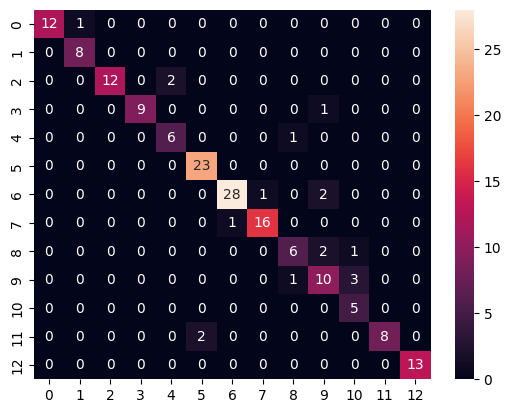

In [13]:
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)
print('Accuracy: %.3f' % accuracy_score(y_pred, y_test))

In [14]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

   ExtendedHandEnd       0.92      1.00      0.96        12
 ExtendedHandStart       1.00      0.89      0.94         9
   LeftIndexClosed       0.86      1.00      0.92        12
 LeftIndexExtended       0.90      1.00      0.95         9
     LeftIndexHook       0.86      0.75      0.80         8
              None       1.00      0.92      0.96        25
           PinchIn       0.90      0.97      0.93        29
          PinchOut       0.94      0.94      0.94        17
  RightIndexClosed       0.67      0.75      0.71         8
RightIndexExtended       0.71      0.67      0.69        15
    RightIndexHook       1.00      0.56      0.71         9
         ThumbDown       0.80      1.00      0.89         8
           ThumbUp       1.00      1.00      1.00        13

          accuracy                           0.90       174
         macro avg       0.89      0.88      0.88       174
      weighted avg       0.90      0.9

In [16]:
with open('models/rf.pkl', 'wb') as file:
    pickle.dump(forest, file)
    file.close()